In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
# warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
import random


# loading facial expression dataset from Kaggle

In [98]:
testData = 'datasetPictures/test/test'
trainData = 'datasetPictures/train/train'

# training list 
imagesTrain = []
labelsTrain = []
print("Loading Train Dataset")
for label in os.listdir(trainData):
    if not label.startswith('.DS'):
        for picture in os.listdir(trainData+'/'+label): # parsing data
            picPath = os.path.join(trainData, label, picture)
            imagesTrain.append(picPath) #input: image
            labelsTrain.append(label) #output: label
        print(label, "Completed")

# testing list
imagesTest = []
labelsTest = []
print("Loading Test Dataset")

for label in os.listdir(testData):
    if not label.startswith('.DS'):
        for picture in os.listdir(testData+'/'+label): # parsing data
            picPath = os.path.join(testData, label, picture)
            imagesTest.append(picPath) #input: image
            labelsTest.append(label) #output: label
        print(label, "Completed")



Loading Train Dataset
happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed
Loading Test Dataset
happy Completed
sad Completed
fear Completed
surprise Completed
neutral Completed
angry Completed
disgust Completed


# creating dataframe

In [99]:
# training
train = pd.DataFrame()
train ['image'] = imagesTrain
train['label'] = labelsTrain
# shuffle the dataset
train = train.sample(frac = 1).reset_index(drop = True) 
train.head()

,image,label
0,datasetPictures/train/train/happy/Training_230...,happy
1,datasetPictures/train/train/angry/Training_328...,angry
2,datasetPictures/train/train/happy/Training_607...,happy
3,datasetPictures/train/train/neutral/Training_4...,neutral
4,datasetPictures/train/train/neutral/Training_2...,neutral


In [87]:
#testing
test = pd.DataFrame()
test ['image'] = imagesTest
test['label'] = labelsTest
test.head()

,image,label
0,datasetPictures/test/test/happy/PrivateTest_45...,happy
1,datasetPictures/test/test/happy/PrivateTest_61...,happy
2,datasetPictures/test/test/happy/PublicTest_536...,happy
3,datasetPictures/test/test/happy/PrivateTest_52...,happy
4,datasetPictures/test/test/happy/PublicTest_411...,happy


# Extracting Features

In [102]:
# function call to extract features from train and test dataframes
def extractFeatures(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    # image size 48x48 pixels; 1 dimension represents grayscale
    width = 48
    height = 48
    dimension = 1
    features = features.reshape(len(features), width, height, dimension)
    return features


In [103]:
trainFeatures = extractFeatures(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [104]:
testFeatures = extractFeatures(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

# Preprocessing data to convert labels (string) to integer values for CNN model

In [90]:
# normalize image so pixels can be in range of 0 and 1
xTrain = trainFeatures/255.0
xTest = testFeatures/255.0

# convert label to integer 
from  sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder()

# stores corresponding mapping of label to an integer
enc.fit(train['label'])

# converts label (string) into an integer 
yTrain = enc.transform(train['label'])
yTest = enc.transform(test['label'])

# classes represents emotion classes
yTrain = to_categorical(yTrain, num_classes = 7)
yTest = to_categorical(yTest, num_classes = 7)



#  Building the Model

In [105]:
# configuration 
width = 48
height = 48
dimension = 1
inputShape = (width, height, dimension)
outputClass = 7

modelCNN = Sequential()

# Creating the convolutional layers
modelCNN.add(Conv2D(128, kernel_size=(3,3), activation="relu", input_shape=inputShape))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Conv2D(512, kernel_size=(3,3), activation="relu"))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Conv2D(512, kernel_size=(3,3), activation="relu"))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.4))

modelCNN.add(Flatten())

# Connected Layers
modelCNN.add(Dense(512, activation='relu'))
modelCNN.add(Dropout(0.4))
modelCNN.add(Dense(256, activation='relu'))
modelCNN.add(Dropout(0.3))

# Output layer
modelCNN.add(Dense(outputClass, activation='softmax'))

modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


# Training the Model

In [106]:
trained = modelCNN.fit(x=xTrain, y=yTrain, batch_size=128, epochs=100, validation_data=(xTest, yTest))


225/225 [==============================] - 368s 2s/step - loss: 1.8226 - accuracy: 0.2476 - val_loss: 1.8170 - val_accuracy: 0.2471


# Plotting Results

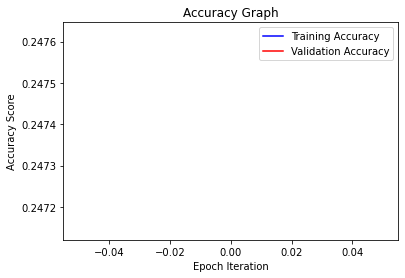

In [156]:
# plotting (x, y, color, label)

plt.plot(range(len(acc)), trained.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(range(len(acc)), trained.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.title("Accuracy Graph")
plt.xlabel('Epoch Iteration')
plt.ylabel('Accuracy Score')
plt.legend() # displays label

plt.show()


# Testing the Model

Original Output: happy
1/1 [==============================] - 0s 27ms/step
Predicted Output: happy
this works


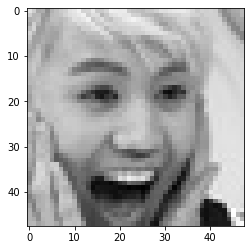

done
Original Output: fear
1/1 [==============================] - 0s 28ms/step
Predicted Output: happy
this works


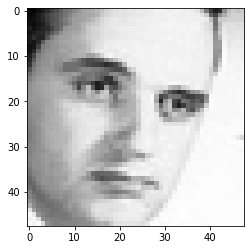

done
Original Output: neutral
1/1 [==============================] - 0s 30ms/step
Predicted Output: happy
this works


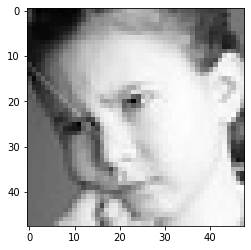

done
Original Output: surprise
1/1 [==============================] - 0s 28ms/step
Predicted Output: happy
this works


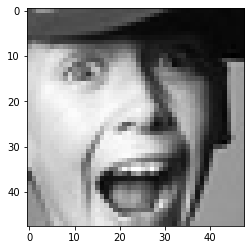

done
Original Output: neutral
1/1 [==============================] - 0s 30ms/step
Predicted Output: happy
this works


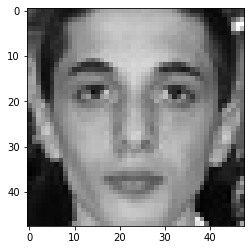

done


In [155]:
# function call to test the model 
def testModel():
    # tests model using a random image 
    imageIndex = random.randint(0, len(test))
    print("Original Output:", test['label'][imageIndex])

    pred = modelCNN.predict(xTest[imageIndex].reshape(1, 48, 48, 1))
    # converts to human readable label
    predictionLabel = enc.inverse_transform([pred.argmax()])[0]

    print("Predicted Output:", predictionLabel)
    # displays image 
    plt.imshow(xTest[imageIndex].reshape(48, 48), cmap='gray')
    plt.show()

for x in range(0, 5): 
    testModel()

